# Exercise 2: Part B

This exercise relates to the *Auto* data set which can be found in `../datasets/Auto.csv` file as a _csv_ file. (The same dataset from Part A).

This part is about __Multiple Linear Regression__.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
def task2_data():
    df = pd.read_csv("../data/Auto.csv")
    df = df.drop("name", axis=1)
    df = df.reset_index()
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors="coerce")
    df = df.dropna()
    return df

task2_data().describe()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,197.520408,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,114.438067,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,98.750000,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,197.500000,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,295.250000,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,396.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Task B1: Visualizing the Linear Regression

Produce a scatterplot matrix which includes all of the variables in data set.

_HINT_: If you can't remember how to do this, look at Exercise 1!

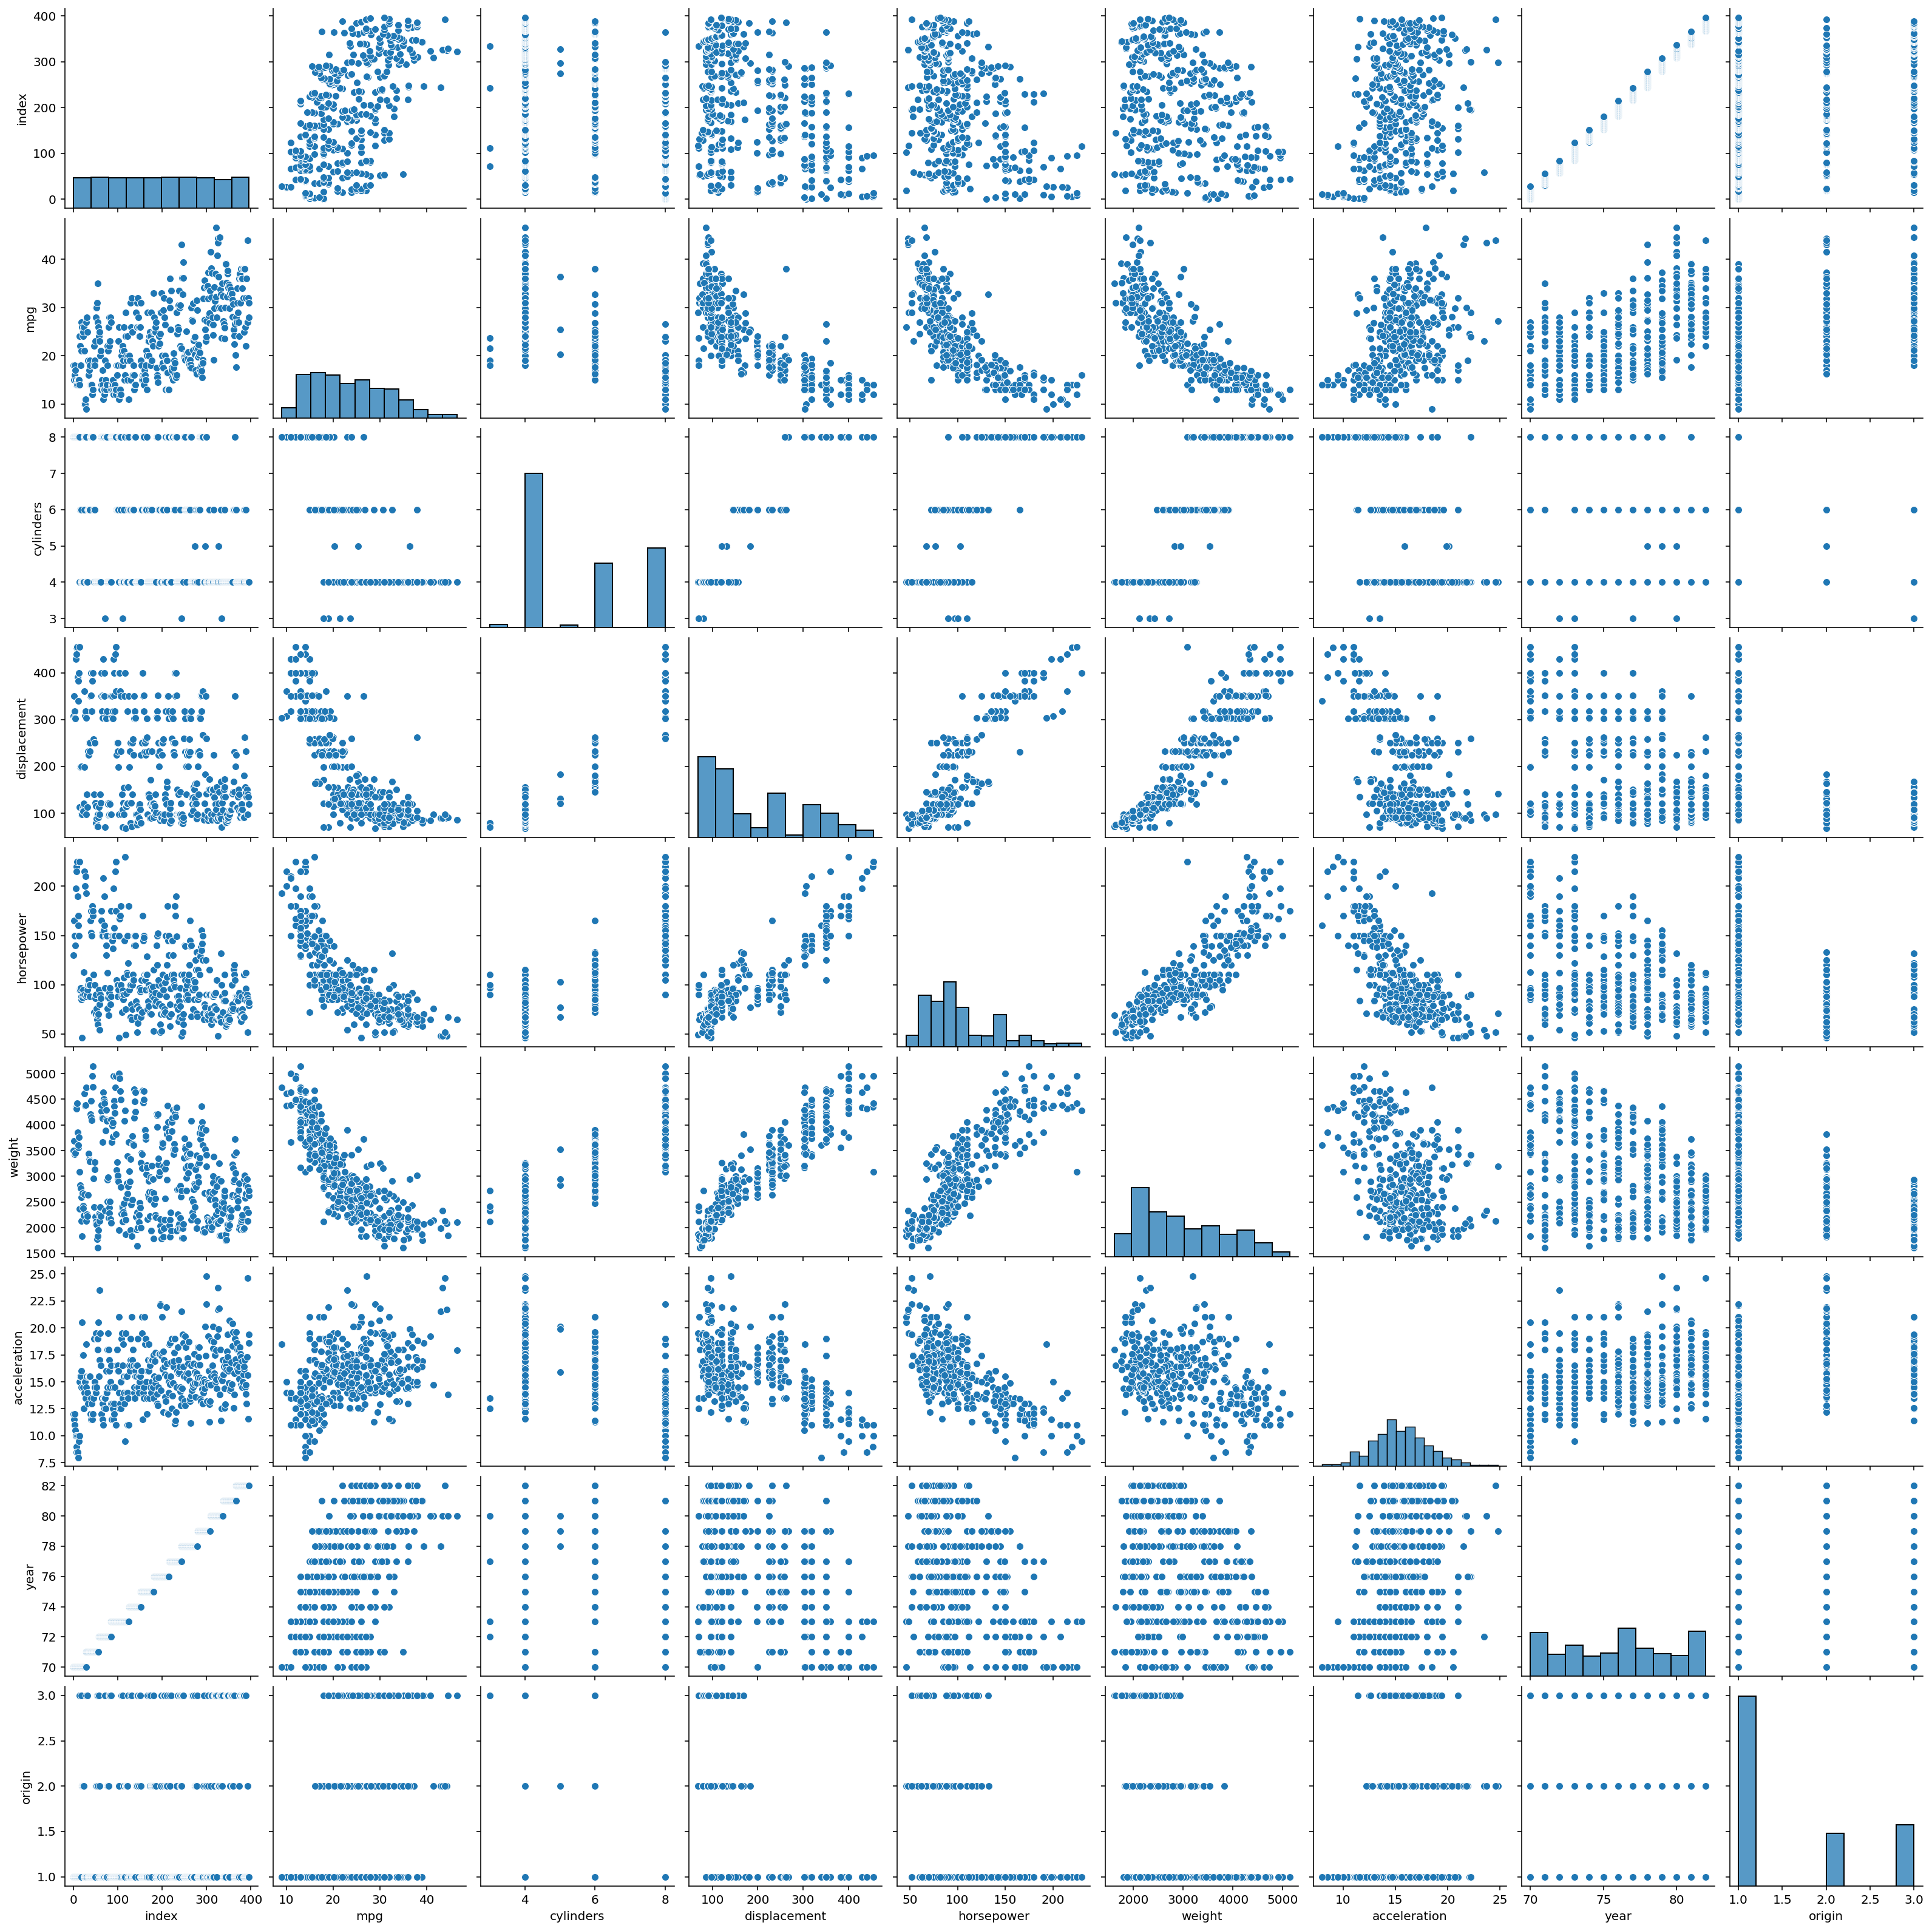

In [3]:
data = task2_data()
sns.pairplot(data)
plt.show()

## Task B2: Correlation

Compute the matrix of correlations between the variables.

_HINT_: `pandas DataFrames` let you do this very easily!

In [4]:
data.corr()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
index,1.000000,0.586330,-0.360275,-0.387146,-0.422925,-0.321747,0.290985,0.996780,0.200576
mpg,0.586330,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.360275,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.387146,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.422925,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.321747,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.290985,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.996780,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.200576,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Task B3: Multiple Linear Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results.

Then consider the following questions:

- i. Is there a relationship between the predictors and the response?
- ii. Which predictors appear to have a statistically significant relationship to the response?
- iii. What does the coefficient for the year variable suggest?

In [7]:

est = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)', data=data).fit()
#C() to use the categorical variable
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          1.79e-139
Time:                        12:46:36   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) Yes there is: R-squared = 0.809 - therefore 80.9 percent of the variance can be explained by the predictors used<br>
ii) Cylinders and Year - since the have the highest absolute coef-value<br>
iii) The change in mpg for a unit change in year. If year rises by 1 then mpg rises by 0.75